# Import Library

In [ ]:
!pip install tensorflowjs

INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 101.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 59.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 108.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 108.8 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully u

In [ ]:
!pip install tensorflow==2.15.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 50.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 73.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 3.8 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.0
    Uninstalling wrapt-1.17.0:
      Successfully uninstalled wrapt-1.17.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
  Attempting uninstall: tensorboard
    Found existing installation

In [ ]:
!pip3 install tensorflow_decision_forests==1.8.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 44.5 MB/s eta 0:00:00
  Attempting uninstall: tensorflow_decision_forests
    Found existing installation: tensorflow_decision_forests 1.11.0
    Uninstalling tensorflow_decision_forests-1.11.0:
      Successfully uninstalled tensorflow_decision_forests-1.11.0


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import shutil
from google.colab import drive
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Import Dataset

## Download Data from Kaggle

In [ ]:
!kaggle datasets download -d dwikrisda/skin-problem-dataset
!unzip skin-problem-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/dwikrisda/skin-problem-dataset
License(s): unknown
100% 34.0M/34.1M [00:00<00:00, 113MB/s] 
100% 34.1M/34.1M [00:00<00:00, 88.6MB/s]
Archive:  skin-problem-dataset.zip
  inflating: Skin Problem Dataset/Test/Acne/Acne_100.jpg  
  inflating: Skin Problem Dataset/Test/Acne/Acne_101.jpg  
  inflating: Skin Problem Dataset/Test/Acne/Acne_102.jpg  
  inflating: Skin Problem Dataset/Test/Acne/Acne_103.jpg  
  inflating: Skin Problem Dataset/Test/Acne/Acne_105.jpg  
  inflating: Skin Problem Dataset/Test/Acne/Acne_106.jpg  
  inflating: Skin Problem Dataset/Test/Acne/Acne_108.jpg  
  inflating: Skin Problem Dataset/Test/Acne/Acne_109.jpg  
  inflating: Skin Problem Dataset/Test/Acne/Acne_11.jpg  
  inflating: Skin Problem Dataset/Test/Acne/Acne_112.jpg  
  inflating: Skin Problem Dataset/Test/Acne/Acne_12.jpg  
  inflating: Skin Problem Dataset/Test/Acne/Acne_14.jpg  
  inflating: Skin Problem Dataset/Test/Acne/Acne_15.jpg  
  inflating: Skin Proble

# Pre Processing Dataset

## Check The Dataset Folder

In [ ]:
# Path folder di Google Drive
folder_path = '/content/Skin Problem Dataset'

# List semua file dalam folder
file_names = os.listdir(folder_path)
print(f"Files in folder: {file_names}")

Files in folder: ['Test', 'Train']


## Count Total Images in Every Folder

In [ ]:
# Define train and test folder
train_folder = '/content/Skin Problem Dataset/Train'
test_folder = '/content/Skin Problem Dataset/Test'

def count_images_in_folder(folder_path):
    total_images = 0
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg', '.png', '.webp')):
                total_images += 1
    return total_images

def count_images_in_train_test(train_folder, test_folder):
    # Check the subfolder in the dataset
    subfolders = [f.name for f in os.scandir(train_folder) if f.is_dir()]

    for subfolder in subfolders:
        train_subfolder_path = os.path.join(train_folder, subfolder)
        test_subfolder_path = os.path.join(test_folder, subfolder)

        # Count the images in train and test
        train_images = count_images_in_folder(train_subfolder_path)
        test_images = count_images_in_folder(test_subfolder_path)

        print(f"Total images in 'train/{subfolder}': {train_images}")
        print(f"Total images in 'test/{subfolder}': {test_images}")

count_images_in_train_test(train_folder, test_folder)

Total images in 'train/Redness': 53
Total images in 'test/Redness': 43
Total images in 'train/Bopeng': 95
Total images in 'test/Bopeng': 73
Total images in 'train/Milia': 98
Total images in 'test/Milia': 78
Total images in 'train/Acne': 96
Total images in 'test/Acne': 72
Total images in 'train/Bags': 65
Total images in 'test/Bags': 50
Total images in 'train/Bruntusan': 99
Total images in 'test/Bruntusan': 79


## Generate Train dan Validation Dataset

In [ ]:
# Define the train and test directory
train_dir = '/content/Skin Problem Dataset/Train'
val_dir = '/content/Skin Problem Dataset/Test'

# Train data generator
train_generator = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(256, 256),
    batch_size=32,
    label_mode='categorical',
    color_mode="rgb",
)

# Validation data generator
val_generator = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    image_size=(256, 256),
    batch_size=32,
    label_mode='categorical',
    color_mode="rgb",
)

SHUFFLE_BUFFER_SIZE = 1000
PREFETCH_BUFFER_SIZE = tf.data.AUTOTUNE

train_dataset_final = (train_generator
                       .cache()
                       .shuffle(SHUFFLE_BUFFER_SIZE)
                       .prefetch(PREFETCH_BUFFER_SIZE)
                       )

validation_dataset_final = (val_generator
                            .cache()
                            .prefetch(PREFETCH_BUFFER_SIZE)
                            )

Found 506 files belonging to 6 classes.
Found 395 files belonging to 6 classes.


# Modelling

## Create Model Layers

In [ ]:
def create_model():
    """Create the classifier model

    Returns:
        tf.keras.model.Sequential: CNN for multi-class classification
    """
    # Define the model
    model = tf.keras.models.Sequential([
        # Define an input layer
        tf.keras.layers.InputLayer(input_shape=(256, 256, 3)),
        # Rescale images
        tf.keras.layers.Rescaling(1./255),
        # First Conv2D layer with MaxPooling
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),

        # Second Conv2D layer with MaxPooling
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),

        # Second Conv2D layer with MaxPooling
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        #tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),

        # Second Conv2D layer with MaxPooling
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),

        # Second Conv2D layer with MaxPooling
        tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),

        # Second Conv2D layer with MaxPooling
        tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),

        # Flatten the output and add dense layers
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1024, activation='relu'),

        # Output layer with 6 units equal to the number of classes
        tf.keras.layers.Dense(6, activation='softmax')  # Softmax for multi-class classification
    ])

    return model

In [ ]:
# Create the model
model= create_model()

## Compile Model

In [ ]:
# Compile the model
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss = 'categorical_crossentropy',
                  metrics = ["accuracy"])

## Model Summary

In [ ]:
#Check the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       7

## Model Evaluation

In [ ]:
print(f'Input shape: {model.input_shape}')
print(f'Output shape: {model.output_shape}')

Input shape: (None, 256, 256, 3)
Output shape: (None, 6)


In [ ]:
for images, labels in train_dataset_final.take(1):
	example_batch_images = images
	example_batch_labels = labels

try:
	model.evaluate(example_batch_images, example_batch_labels, verbose=False)
except:
	print("Your model is not compatible with the dataset you defined earlier. Check that the loss function, last layer and label_mode are compatible with one another.")
else:
	predictions = model.predict(example_batch_images, verbose=False)
	print(f"predictions have shape: {predictions.shape}")

predictions have shape: (32, 6)


## Callbacks

In [ ]:
class EarlyStoppingCallback(tf.keras.callbacks.Callback):

    # Define the correct function signature for on_epoch_end method
    def on_epoch_end(self, epoch, logs=0):

        # Check if the accuracy is greater or equal to 0.98
        if logs['accuracy']>= 0.98:

            # Stop training once the above condition is met
            self.model.stop_training = True

            print("\nReached 98% accuracy so cancelling training!")

## Training Model

In [ ]:
# Train the model
history = model.fit(train_dataset_final,
                    epochs=500,
                    validation_data=validation_dataset_final, callbacks=[EarlyStoppingCallback()])

Epoch 1/500
16/16 [==============================] - 13s 388ms/step - loss: 1.7844 - accuracy: 0.1838 - val_loss: 1.7675 - val_accuracy: 0.3114
Epoch 2/500
16/16 [==============================] - 1s 85ms/step - loss: 1.7607 - accuracy: 0.1917 - val_loss: 1.7537 - val_accuracy: 0.2380
Epoch 3/500
16/16 [==============================] - 1s 78ms/step - loss: 1.7570 - accuracy: 0.1858 - val_loss: 1.7250 - val_accuracy: 0.2481
Epoch 4/500
16/16 [==============================] - 1s 78ms/step - loss: 1.7010 - accuracy: 0.2806 - val_loss: 1.5818 - val_accuracy: 0.3646
Epoch 5/500
16/16 [==============================] - 1s 78ms/step - loss: 1.5449 - accuracy: 0.3478 - val_loss: 1.4705 - val_accuracy: 0.3266
Epoch 6/500
16/16 [==============================] - 1s 78ms/step - loss: 1.4990 - accuracy: 0.3320 - val_loss: 1.4265 - val_accuracy: 0.3544
Epoch 7/500
16/16 [==============================] - 1s 79ms/step - loss: 1.4428 - accuracy: 0.3636 - val_loss: 1.3765 - val_accuracy: 0.3949
Epoc

## Plotting Accuracy and Loss

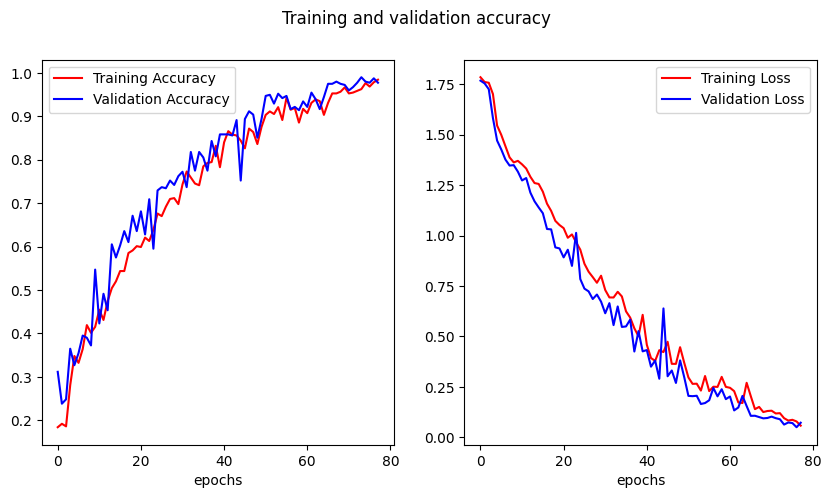

In [ ]:
# Get training and validation accuracies
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Training and validation accuracy')

for i, (data, label) in enumerate(zip([(acc, val_acc), (loss, val_loss)], ["Accuracy", "Loss"])):
    ax[i].plot(epochs, data[0], 'r', label="Training " + label)
    ax[i].plot(epochs, data[1], 'b', label="Validation " + label)
    ax[i].legend()
    ax[i].set_xlabel('epochs')

plt.show()

## Save and Convert Model to TensorFlow.js

### Save to .h5 Model

In [ ]:
saved_model_path = "sample_data/model.h5"

model.save(saved_model_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Convert to TensorFlow.js Model

In [ ]:
!tensorflowjs_converter --input_format=keras sample_data/model.h5 sample_data/tfjs_model_tf

2024-12-11 07:57:32.432130: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-11 07:57:32.432185: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-11 07:57:32.433881: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-11 07:57:33.438650: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
!zip -r /content/sample_data/tfjs_model.zip /content/sample_data/tfjs_model_tf/

  adding: content/sample_data/tfjs_model_tf/ (stored 0%)
  adding: content/sample_data/tfjs_model_tf/group1-shard2of4.bin (deflated 8%)
  adding: content/sample_data/tfjs_model_tf/group1-shard4of4.bin (deflated 8%)
  adding: content/sample_data/tfjs_model_tf/group1-shard1of4.bin (deflated 8%)
  adding: content/sample_data/tfjs_model_tf/model.json (deflated 88%)
  adding: content/sample_data/tfjs_model_tf/group1-shard3of4.bin (deflated 8%)


### Conversion Check

In [ ]:
# Unucomment this if you want to check whether your conversion is success

# !tensorflowjs_converter --input_format=tfjs_layers_model --output_format=keras /content/sample_data/tfjs_model_tf/model.json /content/model_converted.h5


2024-12-11 08:13:44.183064: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-11 08:13:44.183132: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-11 08:13:44.184376: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-11 08:13:45.163566: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-12-11 08:13:47.699584: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2024-12-11 08:13:48.09268

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('/content/model_converted.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       7

# Model Testing

## Test Model with other image

In [ ]:
# Create the widget and take care of the display
from ipywidgets import widgets
from io import BytesIO
import tensorflow as tf
import numpy as np

# Initialize the file upload widget
uploader = widgets.FileUpload(accept="image/*", multiple=True)
display(uploader)
out = widgets.Output()
display(out)

# Define a function to handle predictions
def file_predict(filename, file, out):
    """A function for creating the prediction and printing the output."""
    # Load and preprocess the image
    image = tf.keras.utils.load_img(file, target_size=(256, 256))
    image = tf.keras.utils.img_to_array(image)
    image = np.expand_dims(image, axis=0)

    # Make a prediction
    prediction = model.predict(image, verbose=0)[0]

    # Classes corresponding to the model output
    classes = ['Acne', 'Bags', 'Bopeng', 'Bruntusan', 'Milia', 'Redness']

    # Get the index of the highest probability
    max_index = np.argmax(prediction)
    max_prob = prediction[max_index]
    max_class = classes[max_index]

    # Display the prediction
    with out:
        print(f'\nModel output for {filename}:')
        print(f'  - Predicted class: {max_class} with probability {max_prob:.5f}')

# Define the file upload handler
def on_upload_change(change):
    """A function for getting files from the widget and running the prediction."""
    items = change['new']  # Access the newly uploaded files
    for filename, file_info in items.items():  # Loop through each uploaded file
        file_jpgdata = BytesIO(file_info['content'])
        file_predict(filename, file_jpgdata, out)

# Attach the observer to the uploader widget
uploader.observe(on_upload_change, names='value')

FileUpload(value={}, accept='image/*', description='Upload', multiple=True)

Output()

## Confusion Matrix

13/13 [==============================] - 0s 24ms/step


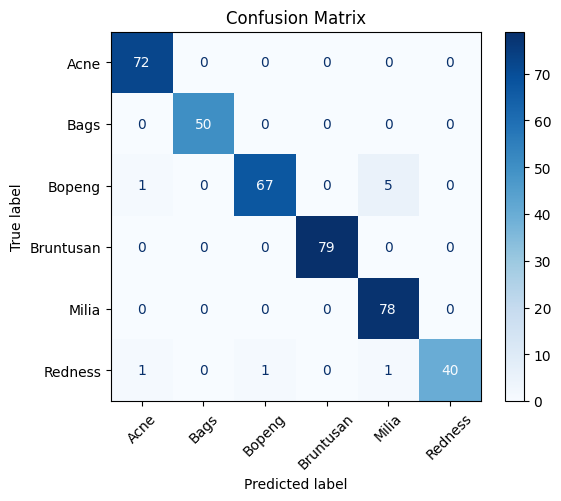

In [ ]:
def plot_confusion_matrix(model, dataset, class_names):
    """
    Plot a confusion matrix for a given model and dataset.

    Args:
        model (tf.keras.Model): Trained Keras model.
        dataset (tf.data.Dataset): Dataset to evaluate (e.g., validation or test set).
        class_names (list): List of class names corresponding to the output labels.
    """
    # Get true labels and predictions
    y_true = np.concatenate([y for _, y in dataset], axis=0)
    y_pred = np.argmax(model.predict(dataset), axis=1)

    # Convert one-hot encoded labels to integers if necessary
    if y_true.ndim > 1:
        y_true = np.argmax(y_true, axis=1)

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Display confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
    plt.title("Confusion Matrix")
    plt.show()

class_names = ['Acne', 'Bags', 'Bopeng', 'Bruntusan', 'Milia', 'Redness']
plot_confusion_matrix(model, validation_dataset_final, class_names)